In [ ]:
# !pip install pycaret

In [1]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

# Data Loading

Geramy Car Prediction (kaggle)

[Reference] https://www.kaggle.com/code/rafaelherrero/linear-regression-90-lasso-ridge-gridsearchcv/input

In [2]:
df = pd.read_csv("./data/germany-car.csv")
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0000,2011


# Preprocessing

## Quality Check

In [3]:
df.describe()

,mileage,price,hp,year
count,46405.0000,46405.0000,46376.0000,46405.0000
mean,71177.8641,16572.3372,132.9910,2016.0130
std,62625.3085,19304.6959,75.4493,3.1552
min,0.0000,1100.0000,1.0000,2011.0000
25%,19800.0000,7490.0000,86.0000,2013.0000
50%,60000.0000,10999.0000,116.0000,2016.0000
75%,105000.0000,19490.0000,150.0000,2019.0000
max,1111111.0000,1199900.0000,850.0000,2021.0000


In [4]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [5]:
print("Before: ", len(df))

df = df.dropna()
print("After: ", len(df))

Before:  46405
After:  46071


In [6]:
df = df.drop_duplicates(keep="first")

print(len(df))
df.head()

43947


,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0000,2011


## Target Distribution

<Axes: xlabel='price', ylabel='Density'>

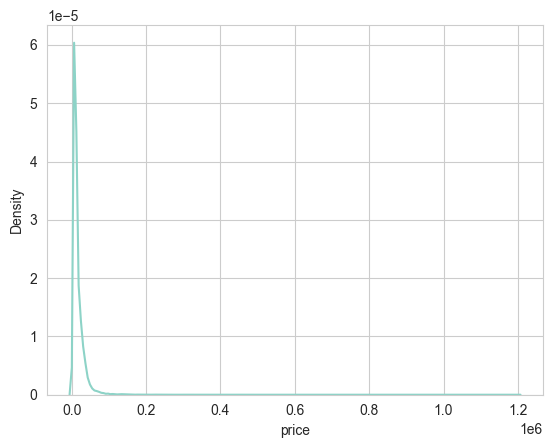

In [7]:
sns.kdeplot(df['price'])

<Axes: xlabel='price', ylabel='Density'>

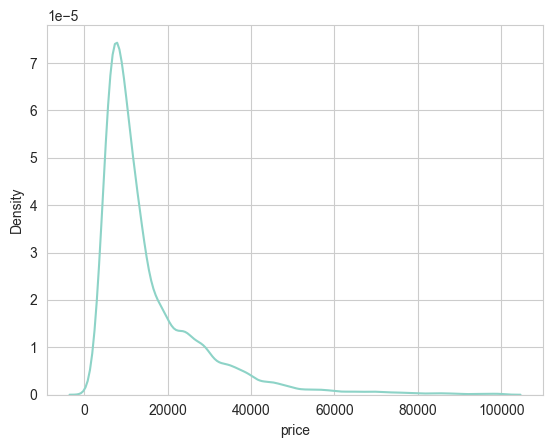

In [8]:
sns.kdeplot(df.loc[lambda x: x['price'] < 100000, 'price'])

## Feature

In [9]:
from datetime import datetime

In [10]:
df['age'] = datetime.now().year - df['year']
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0000,2011,14
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0000,2011,14
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0000,2011,14
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0000,2011,14
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0000,2011,14


In [11]:
df = df.drop(['year'], axis=1)
df.describe()

,mileage,price,hp,age
count,43947.0000,43947.0000,43947.0000,43947.0000
mean,72312.5813,16546.5638,133.6246,9.0687
std,62173.3616,19446.8028,75.0499,3.1201
min,0.0000,1100.0000,1.0000,4.0000
25%,21500.0000,7490.0000,86.0000,6.0000
50%,61309.0000,10990.0000,116.0000,9.0000
75%,106000.0000,19490.0000,150.0000,12.0000
max,1111111.0000,1199900.0000,850.0000,14.0000


## Dummy

In [12]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0000,14
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0000,14
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0000,14
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0000,14
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0000,14


### code

In [13]:
df['fuel'].value_counts()

fuel
Gasoline             27246
Diesel               14684
Electric/Gasoline     1039
Electric               639
CNG                    113
LPG                    109
Electric/Diesel         49
Others                  45
-/- (Fuel)              20
Ethanol                  2
Hydrogen                 1
Name: count, dtype: int64

In [14]:
df['fuel'] = df['fuel'].map(
    {
        "Gasoline": 0,
        "Diesel": 1,
        "Electric/Gasoline": 2,
        "Electric": 2,
        "CNG": 3,
        "LPG": 3,
        "Electric/Diesel": 3,
        "Others": 3,
        "-/- (Fuel)": 3,
        "Ethanol": 3,
        "Hydrogen": 3,
    }
)

df['fuel'].value_counts()

fuel
0    27246
1    14684
2     1678
3      339
Name: count, dtype: int64

In [15]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,age
0,235000,BMW,316,1,Manual,Used,6800,116.0000,14
1,92800,Volkswagen,Golf,0,Manual,Used,6877,122.0000,14
2,149300,SEAT,Exeo,0,Manual,Used,6900,160.0000,14
3,96200,Renault,Megane,0,Manual,Used,6950,110.0000,14
4,156000,Peugeot,308,0,Manual,Used,6950,156.0000,14


### get_dummies

In [16]:
# df['make'].value_counts()
df = df.drop(['make', 'model'], axis=1)
df.head()

,mileage,fuel,gear,offerType,price,hp,age
0,235000,1,Manual,Used,6800,116.0000,14
1,92800,0,Manual,Used,6877,122.0000,14
2,149300,0,Manual,Used,6900,160.0000,14
3,96200,0,Manual,Used,6950,110.0000,14
4,156000,0,Manual,Used,6950,156.0000,14


In [17]:
df['gear'].value_counts()

gear
Manual            28752
Automatic         15141
Semi-automatic       54
Name: count, dtype: int64

In [18]:
pd.get_dummies(df, columns=['gear']).head()

,mileage,fuel,offerType,price,hp,age,gear_Automatic,gear_Manual,gear_Semi-automatic
0,235000,1,Used,6800,116.0000,14,False,True,False
1,92800,0,Used,6877,122.0000,14,False,True,False
2,149300,0,Used,6900,160.0000,14,False,True,False
3,96200,0,Used,6950,110.0000,14,False,True,False
4,156000,0,Used,6950,156.0000,14,False,True,False


In [19]:
df = pd.get_dummies(df, columns=['gear'])
df = pd.get_dummies(df, columns=['offerType'])

df.head()

,mileage,fuel,price,hp,age,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,1,6800,116.0000,14,False,True,False,False,False,False,False,True
1,92800,0,6877,122.0000,14,False,True,False,False,False,False,False,True
2,149300,0,6900,160.0000,14,False,True,False,False,False,False,False,True
3,96200,0,6950,110.0000,14,False,True,False,False,False,False,False,True
4,156000,0,6950,156.0000,14,False,True,False,False,False,False,False,True


## Correlation

In [20]:
df.corr()['price']

mileage                    -0.3056
fuel                        0.1156
price                       1.0000
hp                          0.7450
age                        -0.4114
gear_Automatic              0.4290
gear_Manual                -0.4276
gear_Semi-automatic        -0.0147
offerType_Demonstration     0.2202
offerType_Employee's car    0.1166
offerType_New               0.0475
offerType_Pre-registered    0.0670
offerType_Used             -0.2479
Name: price, dtype: float64

<Axes: >

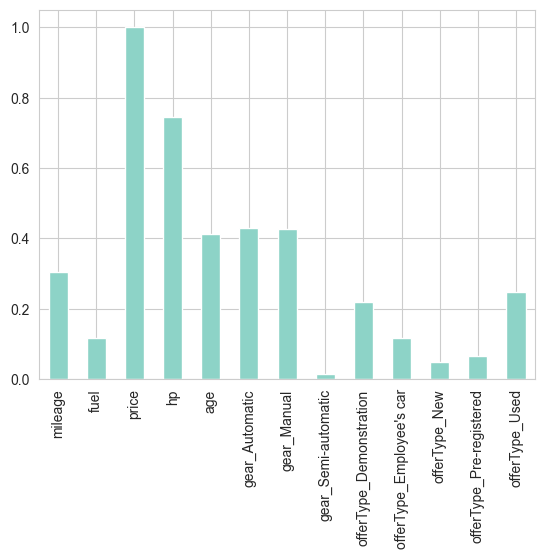

In [21]:
abs(df.corr()['price']).plot.bar()

### price - hp

<Axes: xlabel='hp', ylabel='price'>

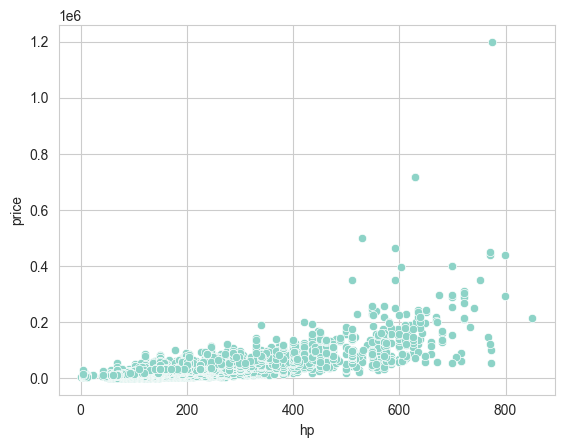

In [22]:
sns.scatterplot(data=df, x='hp', y='price')

<Axes: xlabel='hp', ylabel='price'>

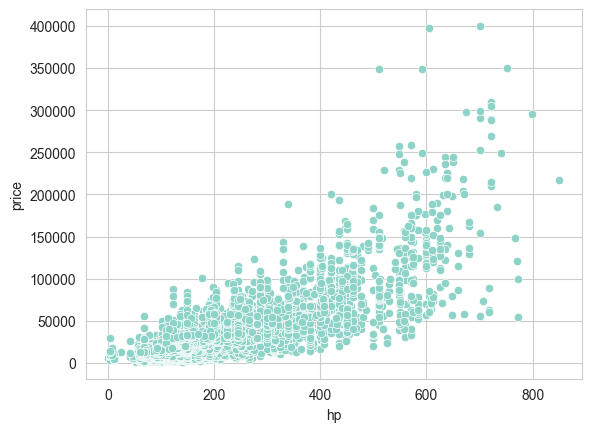

In [23]:
sns.scatterplot(data=df.loc[df.price < 400000], x='hp', y='price')

In [24]:
print(len(df))

df = df.loc[df.price < 400000]
print(len(df))

43947
43939


### price - mileage

<Axes: xlabel='mileage', ylabel='price'>

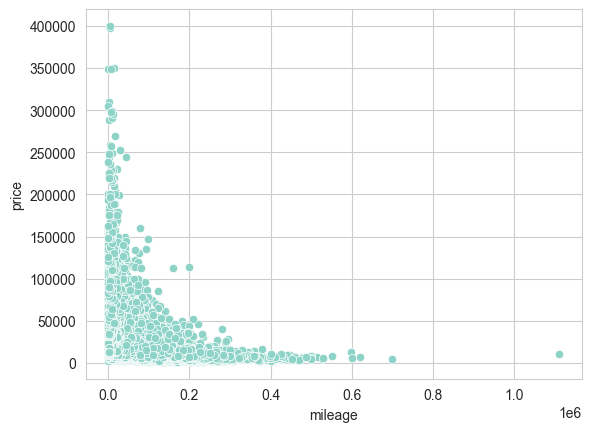

In [25]:
sns.scatterplot(
    data=df,
    x='mileage',
    y='price',
)

<Axes: xlabel='mileage', ylabel='price'>

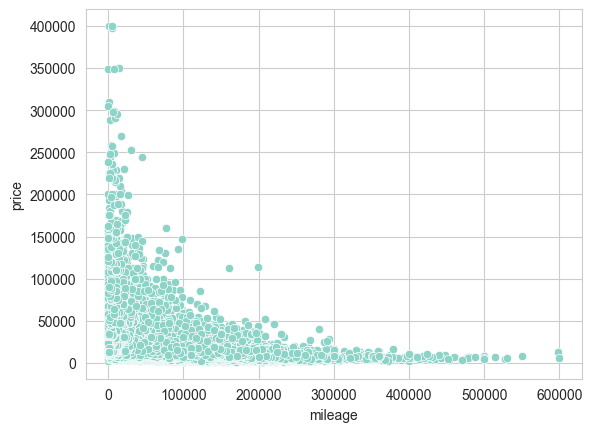

In [26]:
sns.scatterplot(
    data=df.loc[df.mileage < 600000],
    x='mileage',
    y='price',
)

In [27]:
print(len(df))

df = df.loc[df.mileage < 600000]
print(len(df))

43939
43936


# Model

## Data Definition

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

[참고] Y변수를 포함하여 표준화(스케일링) 처리해야 하나요? X변수들만을 대상으로 해야 하나요?


![](./images/scale_y.png)

In [31]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X.columns,
    index=X_train.index,
)

X_test_scaled = pd.DataFrame(
    scaler.fit_transform(X_test),
    columns=X.columns,
    index=X_test.index,
)

In [32]:
X_train.head()

,mileage,fuel,hp,age,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
7063,135601,1,170.0000,10,True,False,False,False,False,False,False,True
33001,10766,0,190.0000,5,True,False,False,False,False,False,False,True
34286,250000,1,204.0000,14,True,False,False,False,False,False,False,True
23706,191000,1,110.0000,13,False,True,False,False,False,False,False,True
22742,22990,0,150.0000,7,True,False,False,False,False,False,False,True


In [33]:
X_train_scaled.head()

,mileage,fuel,hp,age,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
7063,1.0238,0.9289,0.4952,0.2963,1.3784,-1.3747,-0.0350,-0.2304,-0.1583,-0.0169,-0.2242,0.3745
33001,-0.9952,-0.7150,0.7642,-1.3037,1.3784,-1.3747,-0.0350,-0.2304,-0.1583,-0.0169,-0.2242,0.3745
34286,2.8740,0.9289,0.9525,1.5762,1.3784,-1.3747,-0.0350,-0.2304,-0.1583,-0.0169,-0.2242,0.3745
23706,1.9198,0.9289,-0.3118,1.2562,-0.7255,0.7274,-0.0350,-0.2304,-0.1583,-0.0169,-0.2242,0.3745
22742,-0.7975,-0.7150,0.2262,-0.6637,1.3784,-1.3747,-0.0350,-0.2304,-0.1583,-0.0169,-0.2242,0.3745


## Initial Model 

- with pycaret 
- [reference] https://pycaret.gitbook.io/docs

In [34]:
from pycaret.regression import *

In [35]:
reg = setup(
    data=X_train_scaled,
    target=y_train,
    train_size=1-TEST_SIZE,
    session_id=RANDOM_STATE,
)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(35148, 13)"
4,Transformed data shape,"(35148, 13)"
5,Transformed train set shape,"(28118, 13)"
6,Transformed test set shape,"(7030, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [36]:
models = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2643.4201,37812876.6054,6122.3246,0.8682,0.2074,0.1633,0.4510
rf,Random Forest Regressor,2700.2258,38819706.3719,6197.0423,0.8655,0.2152,0.1670,0.5070
gbr,Gradient Boosting Regressor,2809.5806,40224758.3010,6307.7178,0.8603,0.2192,0.1746,0.1700
et,Extra Trees Regressor,2859.9065,41412121.7245,6404.3610,0.8565,0.2322,0.1790,0.3270
xgboost,Extreme Gradient Boosting,2652.0977,45812955.1859,6714.2062,0.8412,0.2036,0.1584,0.0340
knn,K Neighbors Regressor,2861.6668,46781443.3071,6804.4492,0.8382,0.2247,0.1747,0.0490
dt,Decision Tree Regressor,3404.5784,65766390.7996,8074.0850,0.7704,0.2733,0.2087,0.0230
br,Bayesian Ridge,4258.6679,69090824.1649,8277.7857,0.7609,0.6465,0.3384,0.0110
llar,Lasso Least Angle Regression,4258.8264,69090827.5343,8277.7961,0.7609,0.6465,0.3384,0.0080
ridge,Ridge Regression,4259.0688,69090856.7216,8277.7974,0.7609,0.6466,0.3385,0.0080


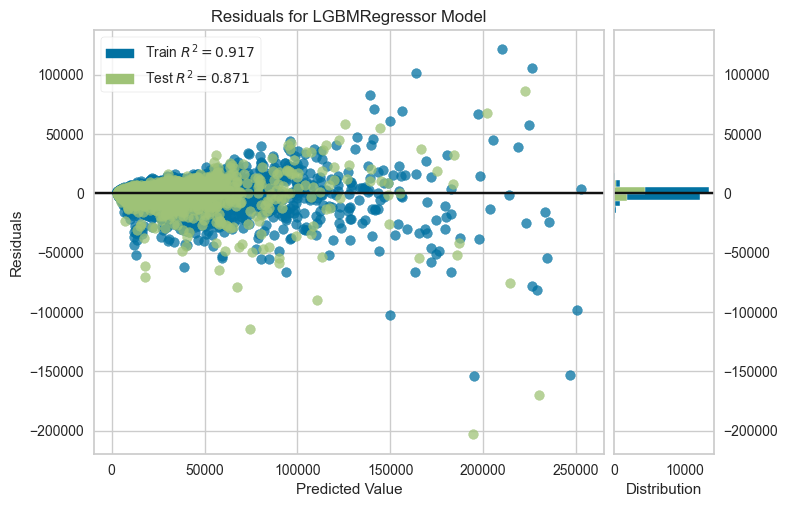

In [37]:
plot_model(models)

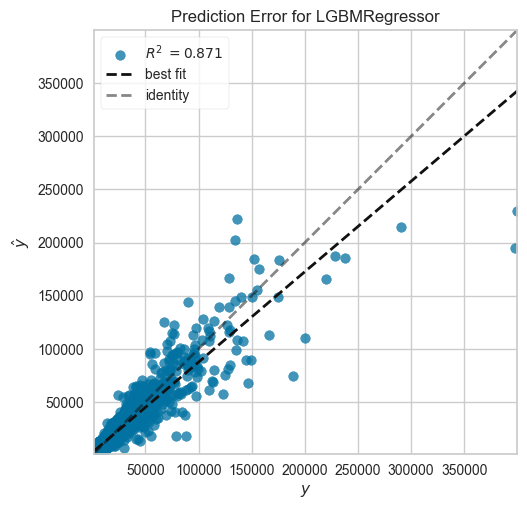

In [38]:
plot_model(models, plot='error')

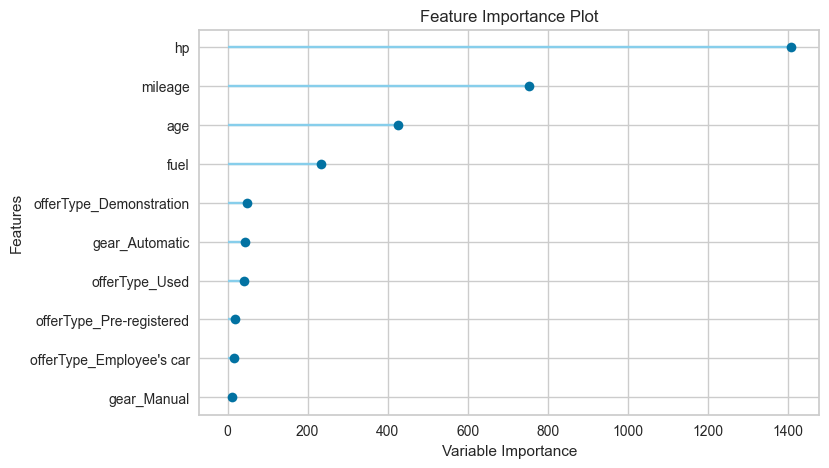

In [39]:
plot_model(models, plot='feature')

## GridSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from lightgbm import LGBMRegressor

In [41]:
model_lgbm = LGBMRegressor(random_state=RANDOM_STATE)

In [42]:
param_grid = {
    'learning_rate': np.arange(0, 0.1, 0.005),
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(1, 10, 1),
    'num_leaves': np.arange(10, 50, 10),
}

In [43]:
grid_search = RandomizedSearchCV(
    estimator=model_lgbm,
    param_distributions=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
)

grid_search.fit(X_train_scaled, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 35148, number of used features: 11
[LightGBM] [Info] Start training from score 16377.910123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095]),
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'num_leaves': array([10, 20, 30, 40])},
                   scoring='neg_mean_squared_error')

In [44]:
print(
    grid_search.best_score_,
    grid_search.best_params_,
)

-38817775.43422675 {'num_leaves': 30, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.085}


## Predict

In [45]:
pred = grid_search.predict(X_test_scaled)

print(
    r2_score(y_test, pred),
    mean_squared_error(y_test, pred),
    mean_absolute_percentage_error(y_test, pred),
)

0.8736141276621829 40979902.998479396 0.16241562922245698


<Axes: xlabel='price'>

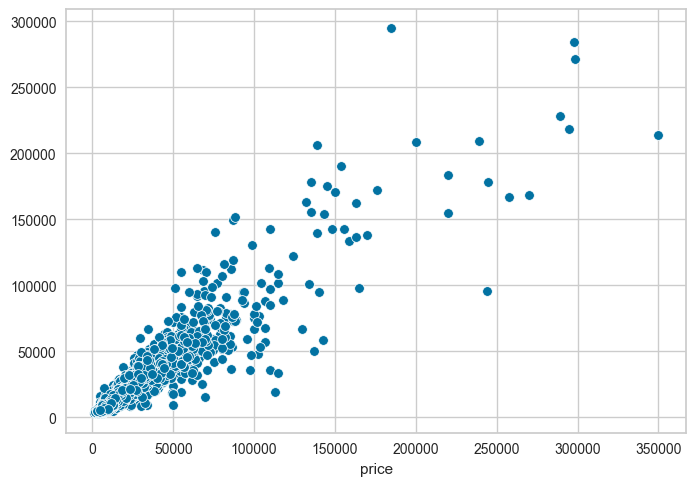

In [46]:
sns.scatterplot(x=y_test, y=pred)

# End of Documents